/Users/TheLuggage/anaconda2/envs/astroconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


('a1 is', 2.555342647652717)
('a2 is', 4.202583931080715)
('a3 is', 2.999031232640903)
('y is', array([ 11790.,   2305.,   6542.,   8017.,  20510.,    569.,   4042.,
        14990.,  26329.,  25770.,  12945.,  18105.,  20017.,    842.,
        23594.,   2305.,  16734.,   9305.,   1290.,    654.]))


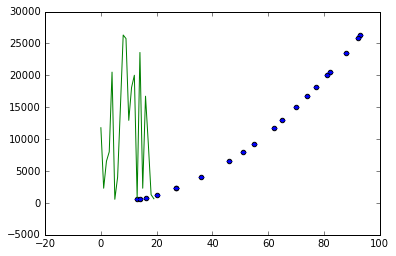

In [1]:
# Program to fit a quadratic function to data

import matplotlib.pyplot as plt
import numpy as np
from numpy import array
import scipy as scipy
from scipy import stats

# Read in data
data = open('/Users/TheLuggage/anaconda2/polydata.dat', 'r') 
lines = data.readlines()[1:] # start reading at line 2

data.close() 

# Create array
x = []
y = []
dy = []

# Append data to the array
for line in lines:
    p = line.split()
    x.append(float(p[0]))
    y.append(float(p[1]))
    dy.append(float(p[2])) 
        
# Create a vector
xVec = np.array(x)
yVec = np.array(y)
dyVec = np.array(dy)
# print("yVec is", yVec)
# print(dyVec)

# The following computes the various sums needed to the quadratic coefficients

a1a = []
a1a = yVec/(dyVec**2.)
a1asum = a2bsum = a3csum = np.sum(a1a)

a1b = []
a1b = xVec/(dyVec**2.)
a1bsum = a2dsum = a3bsum = a3dsum = a4bsum = a4dsum = np.sum(a1b)

a1c = []
a1c = (xVec**2.)/(dyVec**2.)
a1csum = a1esum = a2csum = a2gsum = a3esum = a3gsum = a4csum = a4esum \
	= a4gsum = np.sum(a1c)

a1d = []
a1d = yVec * (xVec/(dyVec**2.))
a1dsum = a2esum = a3fsum = np.sum(a1d)

a1f = []
a1f = (xVec**3.)/(dyVec**2.)
a1fsum = a1hsum = a2fsum = a3hsum = a4fsum = a4hsum = np.sum(a1f)

a1g = []
a1g = yVec * ((xVec**2.)/(dyVec**2.))
a1gsum = a2hsum = a3isum = np.sum(a1g)

a1i = []
a1i = (xVec**4.)/(dyVec**2.)
a1isum = a2isum = a4isum = np.sum(a1i)

a2a = []
a2a = 1/(dyVec**2.)
a2asum = a3asum = a4asum = np.sum(a2a)

# Make arrays for each coefficient

a1array = np.array([[a1asum, a1bsum, a1csum],[a1dsum, a1esum, a1fsum],[a1gsum, a1hsum, a1isum]])
a2array = np.array([[a2asum, a2bsum, a2csum],[a2dsum, a2esum, a2fsum],[a2gsum, a2hsum, a2isum]])
a3array = np.array([[a3asum, a3bsum, a3csum],[a3dsum, a3esum, a3fsum],[a3gsum, a3hsum, a3isum]])
a4array = np.array([[a4asum, a4bsum, a4csum],[a4dsum, a4esum, a4fsum],[a4gsum, a4hsum, a4isum]])

# Calculate the determinants using python function

a1det = scipy.linalg.det(a1array)
a2det = scipy.linalg.det(a2array)
a3det = scipy.linalg.det(a3array)
a4det = scipy.linalg.det(a4array)

# Calculate coefficients

a1 = a1det/a4det
print("a1 is", a1)
a2 = a2det/a4det
print("a2 is", a2)
a3 = a3det/a4det
print("a3 is", a3)

# Plot raw data with error bars
plt.scatter(xVec, yVec)
plt.errorbar(xVec,yVec,yerr=dyVec, linestyle="None")

# Plot quadratic function with coefficients
y = 3*(xVec**2) + 4*xVec + 10
print("y is", y)
# y = a1 + a2*xVec + a3*(xVec**2.)
plt.plot(y)

# Use python function to test code
# (a,m,b) = np.polyfit(xVec, yVec, 2)
# y = np.polyval([a,m,b], xVec)
# plt.plot(xVec, y)
plt.show()